# Description of the project

### The aim is to prepare exchange rate data in a time series analysis. Different machine learning algorithms are then applied to determine which is best able to predict future exchange rates, and with what accuracy.

# 1. Import libraries

In [301]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# 2. Import data from yfinance

In [302]:
start_date = '2015-01-01'
end_date = '2025-01-01'
df = yf.download('EURUSD=X', start=start_date, end=end_date, auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


In [303]:
df = df['Adj Close']

# 3. Data observation and cleaning

In [304]:
df.shape

(2606, 1)

In [305]:
df.head()

Ticker,EURUSD=X
Date,
2015-01-01,1.209863
2015-01-02,1.208941
2015-01-05,1.194643
2015-01-06,1.193902
2015-01-07,1.187536


In [306]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [307]:
df.dtypes

Ticker
EURUSD=X    float64
dtype: object

In [308]:
df.rename(columns={'EURUSD=X': 'EUR/USD'}, inplace=True)

In [309]:
df.isna().any()

Ticker
EUR/USD    False
dtype: bool

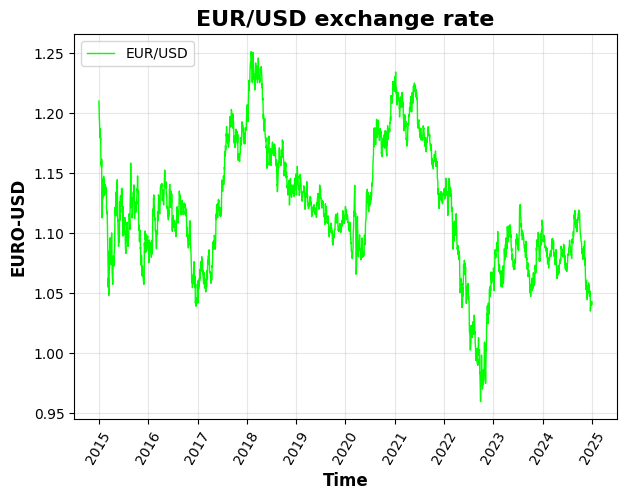

In [310]:
plt.figure(figsize=(7,5), facecolor='w')
plt.title('EUR/USD exchange rate', fontsize=16, fontweight='bold')
plt.plot(df, label='EUR/USD', color='lime', linewidth=1)
plt.xlabel('Time', fontsize=12, fontweight='bold')
plt.xticks(rotation=60)
plt.ylabel('EURO-USD', fontsize=12, fontweight='bold')
plt.grid(alpha=0.3)
plt.legend(loc='upper left')
plt.show()

# 4. Time series creation

In [311]:
for i in range(1, 8):
    df[f'T-{i}'] = df['EUR/USD'].shift(i)

In [312]:
df.dropna(inplace=True)

In [313]:
df.head()

Ticker,EUR/USD,T-1,T-2,T-3,T-4,T-5,T-6,T-7
Date,,,,,,,,
2015-01-12,1.187070,1.179607,1.183600,1.187536,1.193902,1.194643,1.208941,1.209863
2015-01-13,1.183152,1.187070,1.179607,1.183600,1.187536,1.193902,1.194643,1.208941
2015-01-14,1.177829,1.183152,1.187070,1.179607,1.183600,1.187536,1.193902,1.194643
2015-01-15,1.178592,1.177829,1.183152,1.187070,1.179607,1.183600,1.187536,1.193902
2015-01-16,1.163738,1.178592,1.177829,1.183152,1.187070,1.179607,1.183600,1.187536


In [314]:
df.shape

(2599, 8)

# 5. Splitting the data into train and test

In [315]:
n_test = len(df)
n_test = int(20/100*n_test)
n_test

519

In [316]:
X = df
y = X.pop('EUR/USD')

In [317]:
X_train, X_test = X[:-n_test], X[-n_test:]
y_train, y_test = y[:-n_test], y[-n_test:]

In [318]:
X_train.tail(1)

Ticker,T-1,T-2,T-3,T-4,T-5,T-6,T-7
Date,,,,,,,
2023-01-04,1.067771,1.070973,1.066075,1.062925,1.063717,1.064022,1.06678


In [319]:
X_test.head(1)

Ticker,T-1,T-2,T-3,T-4,T-5,T-6,T-7
Date,,,,,,,
2023-01-05,1.054685,1.067771,1.070973,1.066075,1.062925,1.063717,1.064022


# 6. Creation of ML algorithms

In [320]:
models = {'linear_regression': LinearRegression(),
          'random_forest': RandomForestRegressor(),
          'gradient_boosting': GradientBoostingRegressor()}

Simple models without fine-tuning the parameters

In [321]:
scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    scores[name] = accuracy

In [322]:
for name, score in scores.items():
    print(f'{name}: {score*100:.2f}%')

linear_regression: 92.82%
random_forest: 91.25%
gradient_boosting: 92.30%


# 7. Testing the predictions and scores of the models on previous days

In [323]:
data = yf.download('EURUSD=X', start='2025-01-01', end='2025-04-10', auto_adjust=False)
data = data['Adj Close']
data.rename(columns={'EURUSD=X': 'EUR/USD'}, inplace=True)
data.head()

[*********************100%***********************]  1 of 1 completed


Ticker,EUR/USD
Date,
2025-01-02,1.035186
2025-01-03,1.026821
2025-01-06,1.030535
2025-01-07,1.038637
2025-01-08,1.034554


In [324]:
data.isna().sum()

Ticker
EUR/USD    0
dtype: int64

In [325]:
for i in range(1, 8):
    data[f'T-{i}'] = data['EUR/USD'].shift(i)
data.dropna(inplace=True)

In [326]:
X = data.copy()
y = X.pop('EUR/USD')
data_with_predictions = data.copy()

In [327]:
for name, model in models.items():
    y_pred = model.predict(X)
    data_with_predictions[f'{name}_pred'] = y_pred
    print(f'{name}: {model.score(X, y)*100:.2f}%')

linear_regression: 93.91%
random_forest: 90.73%
gradient_boosting: 92.44%


Linear regression in this example is still the best model to predict exchange rate!

In [328]:
data_with_predictions.head()

Ticker,EUR/USD,T-1,T-2,T-3,T-4,T-5,T-6,T-7,linear_regression_pred,random_forest_pred,gradient_boosting_pred
Date,,,,,,,,,,,
2025-01-13,1.024443,1.029760,1.031470,1.034554,1.038637,1.030535,1.026821,1.035186,1.030718,1.029842,1.033310
2025-01-14,1.026525,1.024443,1.029760,1.031470,1.034554,1.038637,1.030535,1.026821,1.024882,1.022865,1.021695
2025-01-15,1.030684,1.026525,1.024443,1.029760,1.031470,1.034554,1.038637,1.030535,1.026496,1.020390,1.021212
2025-01-16,1.029527,1.030684,1.026525,1.024443,1.029760,1.031470,1.034554,1.038637,1.031345,1.031014,1.030733
2025-01-17,1.030195,1.029527,1.030684,1.026525,1.024443,1.029760,1.031470,1.034554,1.030138,1.029746,1.030733


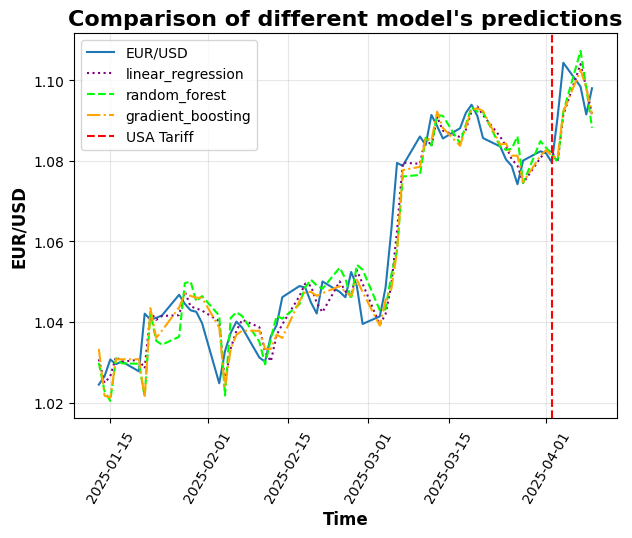

In [329]:
plt.figure(figsize=(7,5), facecolor='w')
plt.plot(data_with_predictions['EUR/USD'], label='EUR/USD')
plt.plot(data_with_predictions['linear_regression_pred'], color='purple', label='linear_regression', ls=':')
plt.plot(data_with_predictions['random_forest_pred'], color='lime', label='random_forest', ls='--')
plt.plot(data_with_predictions['gradient_boosting_pred'], color='orange', label='gradient_boosting', ls='-.')
plt.title("Comparison of different model's predictions", fontsize=16, fontweight='bold')
plt.axvline(pd.to_datetime('2025-04-02'), color='red', ls='--', label='USA Tariff')
plt.xlabel('Time', fontsize=12, fontweight='bold')
plt.xticks(rotation=60)
plt.ylabel('EUR/USD', fontsize=12, fontweight='bold')
plt.grid(alpha=0.3)
plt.legend(loc='upper left')
plt.show()